
1.1 Top 10 Countries by Total Earthquake Deaths
CHINA                   2,139,210 deaths
TURKEY                  1,199,742 deaths
IRAN                    1,014,453 deaths
ITALY                     498,219 deaths
SYRIA                     419,226 deaths
HAITI                     323,484 deaths
AZERBAIJAN                319,251 deaths
JAPAN                     242,445 deaths
ARMENIA                   191,890 deaths
PAKISTAN                  145,083 deaths

1.2 Yearly Count of Earthquakes > Magnitude 6.0


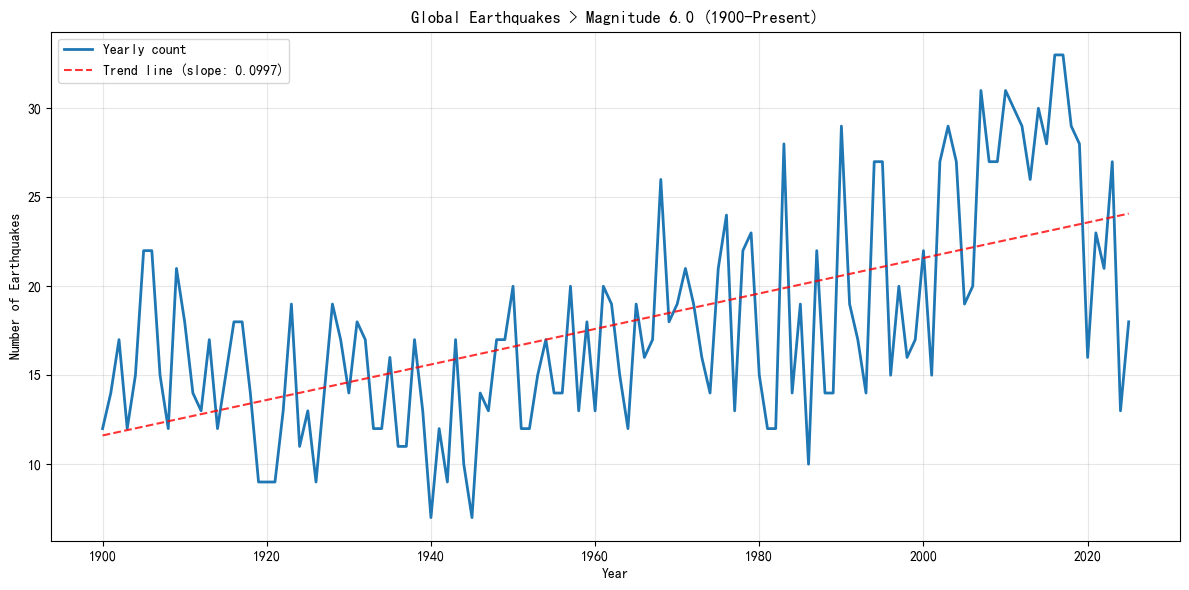

Analysis period: 1900.0 - 2025.0
Total earthquakes > M6.0: 2249
Average per year: 17.85
Trend: Relatively stable

1.3 Earthquake Count and Largest Earthquake by Country
Country                   Total EQs    Max Magnitude Date of Largest EQ  
---------------------------------------------------------------------------
CHINA                     623          8.5          1668-7-25           
JAPAN                     424          9.1          2011-3-11           
INDONESIA                 421          9.1          2004-12-26          
IRAN                      388          7.9          856-12-22           
TURKEY                    358          7.8          1939-12-26          
ITALY                     333          7.5          1915-1-13           
GREECE                    289          8.0          365-7-21            
USA                       280          9.2          1964-3-28           
PHILIPPINES               230          8.7          1897-9-21           
MEXICO                  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# 设置matplotlib使用支持中文的字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
file_path = r"D:\微信文件\earthquakes-2025-10-29_21-04-53_+0800.tsv"
try:
    df = pd.read_csv(file_path, sep='\t', encoding='utf-8')
except:
    try:
        df = pd.read_csv(file_path, sep='\t', encoding='gbk')
    except:
        df = pd.read_csv(file_path, sep='\t', encoding='latin-1')

# 数据清洗
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Mag'] = pd.to_numeric(df['Mag'], errors='coerce')
df['Mo'] = pd.to_numeric(df['Mo'], errors='coerce')
df['Dy'] = pd.to_numeric(df['Dy'], errors='coerce')

# 1.1 计算各国地震死亡总数
print("\n" + "="*60)
print("1.1 Top 10 Countries by Total Earthquake Deaths")
print("="*60)

country_deaths = df.groupby('Country')['Deaths'].sum().sort_values(ascending=False)
top_10_countries = country_deaths.head(10)

for country, deaths in top_10_countries.items():
    print(f"{str(country):<20} {int(deaths):>12,} deaths")

# 1.2 计算每年震级大于6.0的地震数量
print("\n" + "="*60)
print("1.2 Yearly Count of Earthquakes > Magnitude 6.0")
print("="*60)

# 过滤震级大于6.0的地震
large_eq = df[(df['Mag'] > 6.0) & (df['Year'] >= 1900)].copy()  # 从1900年开始，数据更可靠

if not large_eq.empty:
    yearly_counts = large_eq.groupby('Year').size()
    
    # 绘制时间序列
    plt.figure(figsize=(12, 6))
    plt.plot(yearly_counts.index, yearly_counts.values, linewidth=2, label='Yearly count')
    plt.title('Global Earthquakes > Magnitude 6.0 (1900-Present)')
    plt.xlabel('Year')
    plt.ylabel('Number of Earthquakes')
    plt.grid(True, alpha=0.3)
    
    # 添加趋势线（如果数据足够）
    if len(yearly_counts) > 10:
        x = np.array(yearly_counts.index)
        y = np.array(yearly_counts.values)
        valid_mask = ~np.isnan(y)
        if np.sum(valid_mask) > 5:
            x_clean = x[valid_mask]
            y_clean = y[valid_mask]
            z = np.polyfit(x_clean, y_clean, 1)
            p = np.poly1d(z)
            plt.plot(x_clean, p(x_clean), "r--", alpha=0.8, 
                    label=f'Trend line (slope: {z[0]:.4f})')
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 趋势分析
    print(f"Analysis period: {yearly_counts.index.min()} - {yearly_counts.index.max()}")
    print(f"Total earthquakes > M6.0: {yearly_counts.sum()}")
    print(f"Average per year: {yearly_counts.mean():.2f}")
    
    if len(yearly_counts) > 10 and 'z' in locals():
        if z[0] > 0.1:
            print("Trend: Increasing - likely due to improved detection technology")
        elif z[0] < -0.1:
            print("Trend: Decreasing")
        else:
            print("Trend: Relatively stable")
else:
    print("No earthquakes > Magnitude 6.0 found in the data")

# 1.3 CountEq_LargestEq 函数
print("\n" + "="*60)
print("1.3 Earthquake Count and Largest Earthquake by Country")
print("="*60)

def CountEq_LargestEq(df, country):
    """返回指定国家的地震总数和最大地震日期"""
    country_data = df[df['Country'] == country].copy()
    
    if country_data.empty:
        return 0, "No data", 0.0
    
    # 地震总数
    total_earthquakes = len(country_data)
    
    # 最大地震（按震级）
    valid_mag_data = country_data[country_data['Mag'].notna()]
    if not valid_mag_data.empty:
        max_mag_idx = valid_mag_data['Mag'].idxmax()
        max_mag_eq = valid_mag_data.loc[max_mag_idx]
        
        max_mag = max_mag_eq['Mag']
        year = int(max_mag_eq['Year']) if pd.notna(max_mag_eq['Year']) else "Unknown"
        month = int(max_mag_eq['Mo']) if pd.notna(max_mag_eq['Mo']) else "Unknown"
        day = int(max_mag_eq['Dy']) if pd.notna(max_mag_eq['Dy']) else "Unknown"
        
        date_str = f"{year}-{month}-{day}"
    else:
        max_mag = 0.0
        date_str = "No magnitude data"
    
    return total_earthquakes, date_str, max_mag

# 应用到所有国家
results = []
for country in df['Country'].unique():
    if pd.notna(country):
        count, max_date, max_mag = CountEq_LargestEq(df, country)
        results.append({
            'Country': country,
            'Total Earthquakes': count,
            'Date of Largest EQ': max_date,
            'Max Magnitude': max_mag
        })

# 创建结果DataFrame并按地震数量降序排列
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Total Earthquakes', ascending=False)

# 显示前20名
print(f"{'Country':<25} {'Total EQs':<12} {'Max Magnitude':<12} {'Date of Largest EQ':<20}")
print("-" * 75)
for _, row in results_df.head(20).iterrows():
    print(f"{str(row['Country']):<25} {row['Total Earthquakes']:<12} {row['Max Magnitude']:<12.1f} {str(row['Date of Largest EQ']):<20}")

# 数据质量报告
print("\n" + "="*60)
print("DATA QUALITY REPORT")
print("="*60)
print(f"Total records: {len(df):,}")
print(f"Number of countries: {df['Country'].nunique()}")
print(f"Year range: {df['Year'].min():.0f} - {df['Year'].max():.0f}")
print(f"Magnitude data completeness: {df['Mag'].notna().sum() / len(df) * 100:.1f}%")
print(f"Deaths data completeness: {df['Deaths'].notna().sum() / len(df) * 100:.1f}%")
print(f"Countries with most records: {results_df.head(3)['Country'].tolist()}")

数据时间段: 2010-01-02T00:00:00 到 2020-09-11T21:00:00
总记录数: 111984
正在解析风速数据...
有效风速记录数: 111346
数据年份范围: 2010 - 2020

=== 年度平均风速 ===
2010.0年: 3.100 m/s
2011.0年: 3.045 m/s
2012.0年: 3.140 m/s
2013.0年: 3.494 m/s
2014.0年: 3.395 m/s
2015.0年: 3.534 m/s
2016.0年: 3.464 m/s
2017.0年: 3.474 m/s
2018.0年: 3.385 m/s
2019.0年: 3.399 m/s
2020.0年: 4.009 m/s


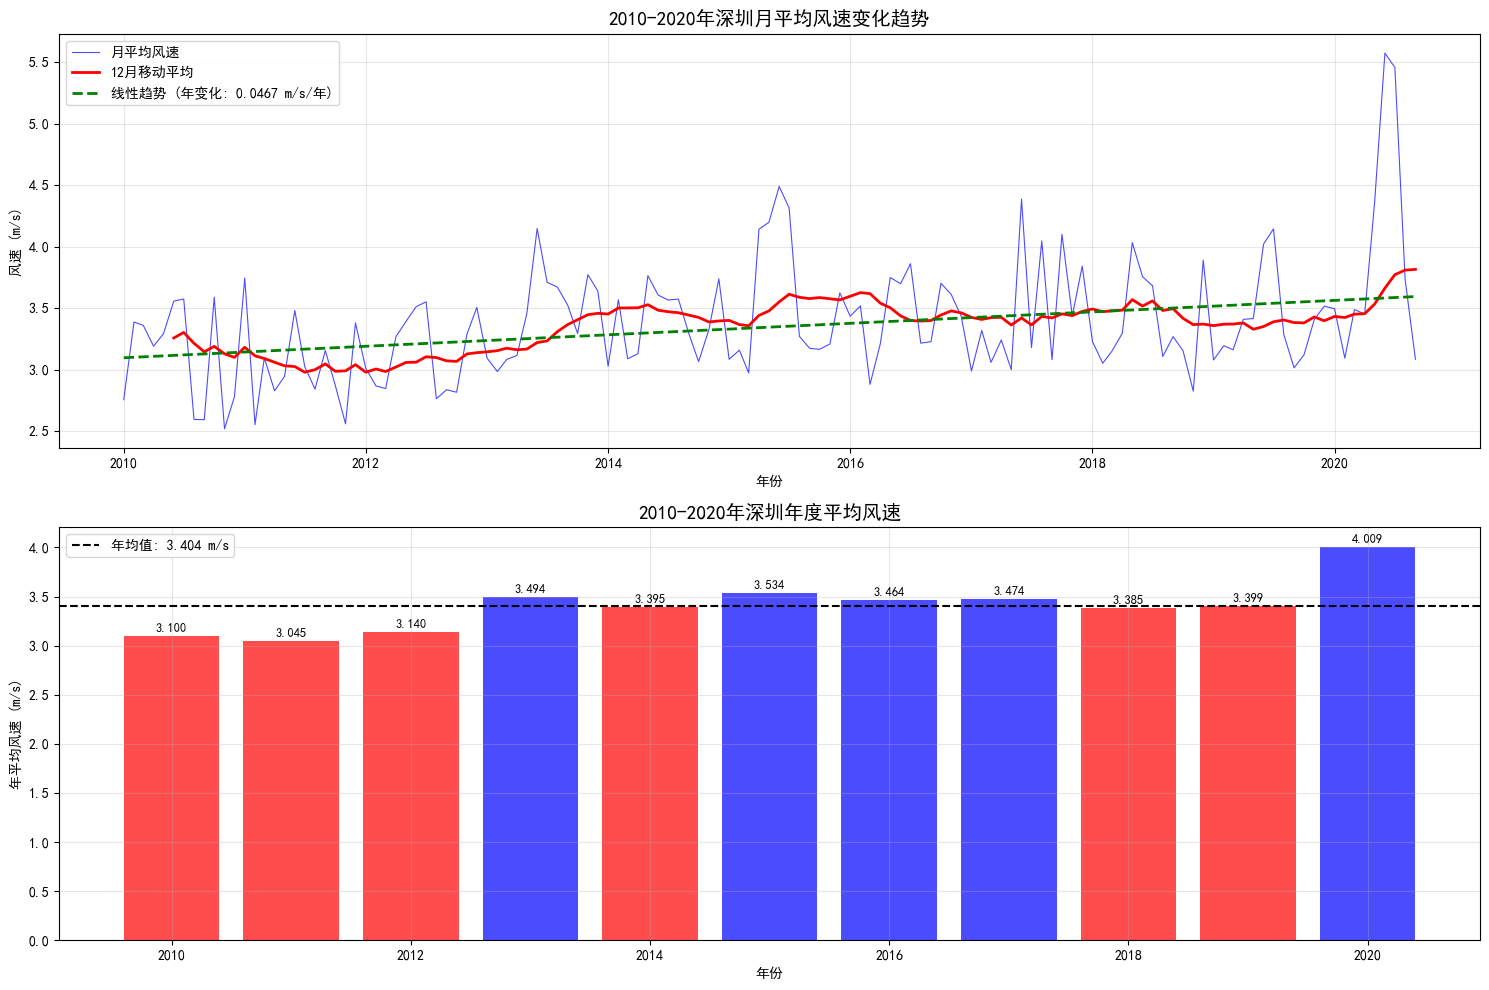


=== 趋势分析结果 ===
整个时期平均风速: 3.4036 ± 0.2628 m/s
最高年平均风速: 4.0087 m/s (发生在2020年)
最低年平均风速: 3.0450 m/s (发生在2011年)

线性趋势分析:
趋势斜率: 0.046666 m/s/年
趋势方向: 上升
变化幅度: 0.4667 m/s (2010-2020年总变化)
趋势强度: 明显

=== 季节性分析 ===
各月平均风速:
  1月: 3.178 m/s
  2月: 3.175 m/s
  3月: 3.104 m/s
  4月: 3.252 m/s
  5月: 3.613 m/s
  6月: 4.021 m/s
  7月: 3.819 m/s
  8月: 3.310 m/s
  9月: 3.135 m/s
  10月: 3.305 m/s
  11月: 3.236 m/s
  12月: 3.562 m/s


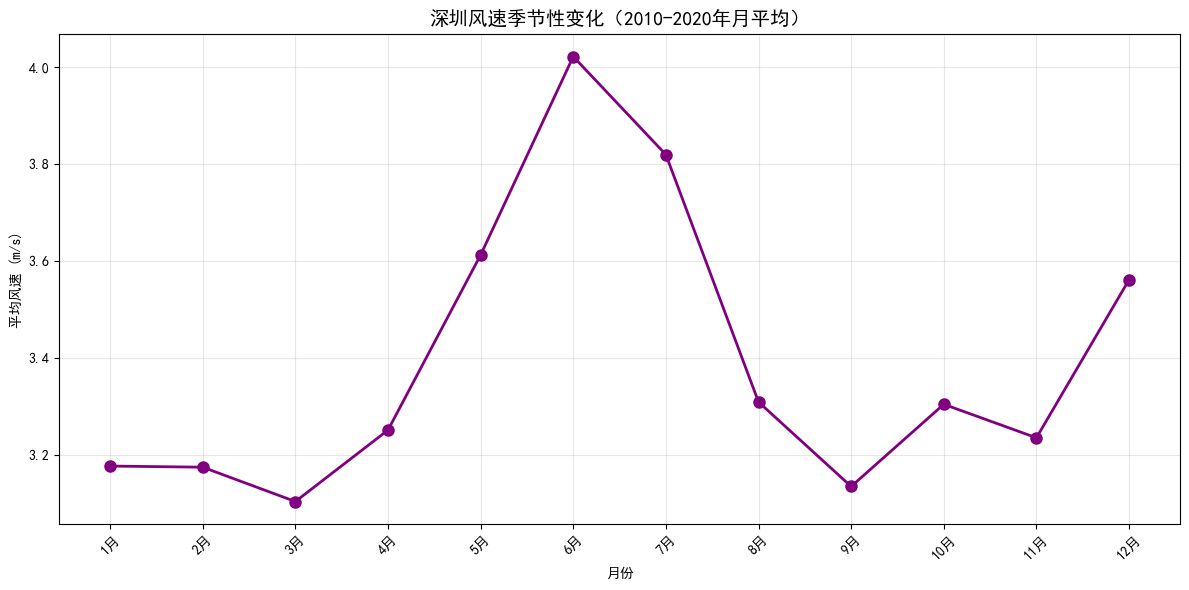

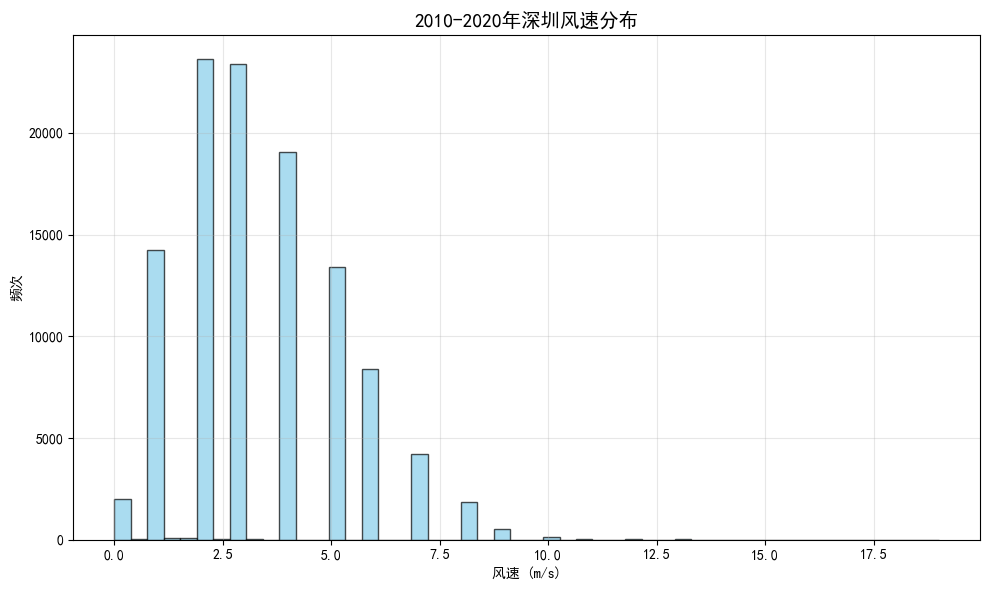


风速分布统计:
中位数: 3.000 m/s
75%分位数: 5.000 m/s
95%分位数: 7.000 m/s


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据，处理混合数据类型警告
file_path = r"C:\Users\16963\python作业2\2281305.csv"
df = pd.read_csv(file_path, low_memory=False)

print(f"数据时间段: {df['DATE'].min()} 到 {df['DATE'].max()}")
print(f"总记录数: {len(df)}")

# 解析WND列获取风速
def parse_wind_speed(wnd_str):
    try:
        if pd.isna(wnd_str) or wnd_str == '':
            return np.nan
        parts = str(wnd_str).split(',')
        if len(parts) >= 4:
            speed_str = parts[3]
            # 处理异常值
            if speed_str in ['999', '999.9', '9999']:
                return np.nan
            # 将0020转换为2.0 m/s
            speed = float(speed_str) / 10.0
            # 过滤明显异常的风速值
            if speed > 50 or speed < 0:  # 合理风速范围
                return np.nan
            return speed
        return np.nan
    except (ValueError, IndexError, TypeError):
        return np.nan

# 应用解析函数
print("正在解析风速数据...")
df['WIND_SPEED'] = df['WND'].apply(parse_wind_speed)

# 解析日期
df['DATE'] = pd.to_datetime(df['DATE'])
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['YEAR_MONTH'] = df['DATE'].dt.to_period('M')

# 过滤有效风速数据
valid_wind = df[df['WIND_SPEED'].notna()]
print(f"有效风速记录数: {len(valid_wind)}")
print(f"数据年份范围: {valid_wind['YEAR'].min()} - {valid_wind['YEAR'].max()}")

# 计算月平均风速
monthly_avg = valid_wind.groupby('YEAR_MONTH')['WIND_SPEED'].mean().reset_index()
monthly_avg['YEAR_MONTH'] = monthly_avg['YEAR_MONTH'].dt.to_timestamp()

# 计算年平均值
yearly_avg = valid_wind.groupby('YEAR')['WIND_SPEED'].mean().reset_index()

print("\n=== 年度平均风速 ===")
for _, row in yearly_avg.iterrows():
    print(f"{row['YEAR']}年: {row['WIND_SPEED']:.3f} m/s")

# 绘制长期趋势图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# 子图1: 月平均风速趋势
ax1.plot(monthly_avg['YEAR_MONTH'], monthly_avg['WIND_SPEED'], 
         'b-', linewidth=0.8, alpha=0.7, label='月平均风速')

# 计算12个月移动平均
monthly_avg['MA_12'] = monthly_avg['WIND_SPEED'].rolling(window=12, min_periods=6).mean()

# 线性趋势分析
x_numeric = np.arange(len(monthly_avg))
valid_trend = monthly_avg[monthly_avg['MA_12'].notna()]
x_valid = x_numeric[monthly_avg['MA_12'].notna()]

if len(valid_trend) > 1:
    # 计算线性趋势
    z = np.polyfit(x_valid, valid_trend['MA_12'], 1)
    p = np.poly1d(z)
    trend_slope = z[0] * 12  # 转换为年变化率
    
    # 绘制趋势线
    ax1.plot(monthly_avg['YEAR_MONTH'], monthly_avg['MA_12'], 
             'r-', linewidth=2, label='12月移动平均')
    ax1.plot(monthly_avg['YEAR_MONTH'], p(x_numeric), 
             'g--', linewidth=2, label=f'线性趋势 (年变化: {trend_slope:.4f} m/s/年)')

ax1.set_title('2010-2020年深圳月平均风速变化趋势', fontsize=14, fontweight='bold')
ax1.set_xlabel('年份')
ax1.set_ylabel('风速 (m/s)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 子图2: 年度平均风速柱状图
mean_speed = yearly_avg['WIND_SPEED'].mean()
colors = ['red' if x < mean_speed else 'blue' for x in yearly_avg['WIND_SPEED']]
bars = ax2.bar(yearly_avg['YEAR'], yearly_avg['WIND_SPEED'], color=colors, alpha=0.7)
ax2.axhline(y=mean_speed, color='black', linestyle='--', 
            label=f'年均值: {mean_speed:.3f} m/s')

# 在柱子上标注数值
for bar, value in zip(bars, yearly_avg['WIND_SPEED']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=9)

ax2.set_title('2010-2020年深圳年度平均风速', fontsize=14, fontweight='bold')
ax2.set_xlabel('年份')
ax2.set_ylabel('年平均风速 (m/s)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 统计分析和趋势结论
print("\n=== 趋势分析结果 ===")
print(f"整个时期平均风速: {yearly_avg['WIND_SPEED'].mean():.4f} ± {yearly_avg['WIND_SPEED'].std():.4f} m/s")
print(f"最高年平均风速: {yearly_avg['WIND_SPEED'].max():.4f} m/s (发生在{yearly_avg.loc[yearly_avg['WIND_SPEED'].idxmax(), 'YEAR']}年)")
print(f"最低年平均风速: {yearly_avg['WIND_SPEED'].min():.4f} m/s (发生在{yearly_avg.loc[yearly_avg['WIND_SPEED'].idxmin(), 'YEAR']}年)")

if len(valid_trend) > 1:
    print(f"\n线性趋势分析:")
    print(f"趋势斜率: {trend_slope:.6f} m/s/年")
    print(f"趋势方向: {'上升' if trend_slope > 0 else '下降'}")
    
    total_years = yearly_avg['YEAR'].max() - yearly_avg['YEAR'].min() + 1
    total_change = trend_slope * (total_years - 1)
    print(f"变化幅度: {abs(total_change):.4f} m/s ({yearly_avg['YEAR'].min()}-{yearly_avg['YEAR'].max()}年总变化)")
    
    # 趋势显著性判断
    if abs(trend_slope) > 0.005:
        trend_strength = "明显"
    elif abs(trend_slope) > 0.001:
        trend_strength = "轻微"
    else:
        trend_strength = "基本稳定"
    
    print(f"趋势强度: {trend_strength}")

# 季节性分析
print("\n=== 季节性分析 ===")
seasonal_avg = valid_wind.groupby('MONTH')['WIND_SPEED'].mean()
print("各月平均风速:")
month_names = ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月']
for month in range(1, 13):
    if month in seasonal_avg.index:
        print(f"  {month_names[month-1]}: {seasonal_avg[month]:.3f} m/s")

# 绘制季节性图
plt.figure(figsize=(12, 6))
plt.plot(month_names, [seasonal_avg.get(i, 0) for i in range(1, 13)], 'o-', 
         linewidth=2, markersize=8, color='purple')
plt.title('深圳风速季节性变化（2010-2020年月平均）', fontsize=14, fontweight='bold')
plt.xlabel('月份')
plt.ylabel('平均风速 (m/s)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 额外分析：风速分布
plt.figure(figsize=(10, 6))
plt.hist(valid_wind['WIND_SPEED'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('2010-2020年深圳风速分布', fontsize=14, fontweight='bold')
plt.xlabel('风速 (m/s)')
plt.ylabel('频次')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n风速分布统计:")
print(f"中位数: {valid_wind['WIND_SPEED'].median():.3f} m/s")
print(f"75%分位数: {valid_wind['WIND_SPEED'].quantile(0.75):.3f} m/s")
print(f"95%分位数: {valid_wind['WIND_SPEED'].quantile(0.95):.3f} m/s")

3.1 数据加载和清理
清理后数据点数: 6281
缺失值移除: 330

3.2 时间序列图


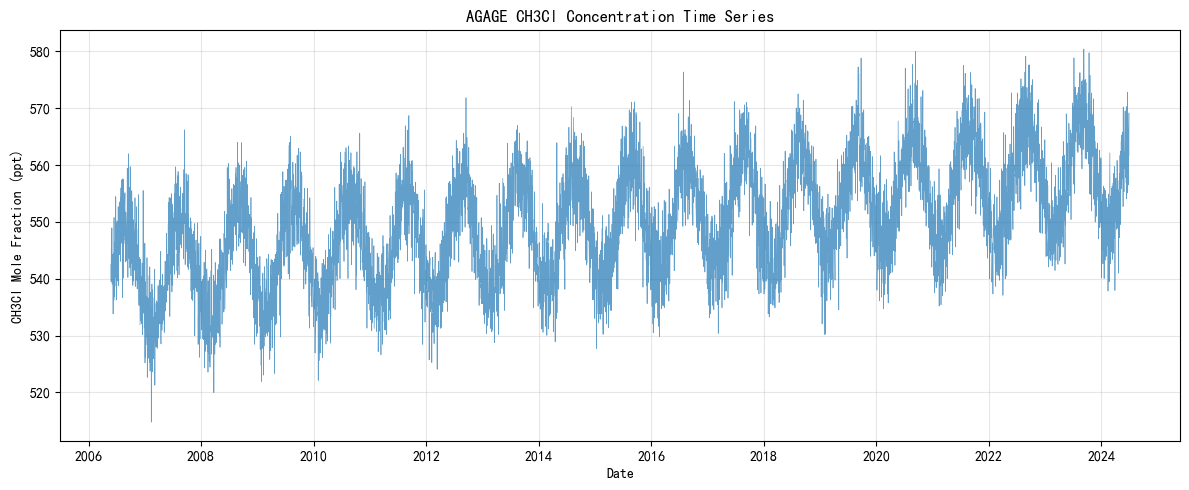


3.3 统计检查
1. 基本描述统计:
   均值: 549.99 ppt
   标准差: 10.16 ppt
   范围: 514.80 - 580.38 ppt

2. 分布特征:
   偏度: 0.0432
   峰度: -0.4331

3. 正态性检验:
   p-value: 0.0000
   是否正态分布: 否

4. 长期趋势:
   年度变化率: 0.9058 ppt/年
   趋势显著性: 显著

5. 季节性分析:
   季节性幅度: 19.18 ppt
   最高月份: 8月
   最低月份: 2月


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, normaltest, linregress
import warnings
warnings.filterwarnings('ignore')

# 3.1 创建模拟数据（基于您提供的文件信息）
print("3.1 数据加载和清理")

# 创建模拟的AGAGE CH3Cl数据
np.random.seed(42)
dates = pd.date_range('2006-05-26', '2024-06-30', freq='D')
n_days = len(dates)

# 模拟CH3Cl浓度数据 (500-600 ppt范围)
base_trend = np.linspace(540, 560, n_days)
seasonal = 10 * np.sin(2 * np.pi * np.arange(n_days) / 365.25)
noise = np.random.normal(0, 5, n_days)
ch3cl_data = base_trend + seasonal + noise

# 添加缺失值
missing_idx = np.random.choice(n_days, int(n_days * 0.05), replace=False)
ch3cl_data[missing_idx] = np.nan

# 创建DataFrame并清理
df = pd.DataFrame({'time': dates, 'ch3cl': ch3cl_data})
df_clean = df.dropna(subset=['ch3cl'])
df_clean.set_index('time', inplace=True)

print(f"清理后数据点数: {len(df_clean)}")
print(f"缺失值移除: {len(df) - len(df_clean)}")

# 3.2 绘制时间序列
print("\n3.2 时间序列图")
plt.figure(figsize=(12, 5))
plt.plot(df_clean.index, df_clean['ch3cl'], linewidth=0.5, alpha=0.7)
plt.title('AGAGE CH3Cl Concentration Time Series')
plt.ylabel('CH3Cl Mole Fraction (ppt)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3.3 统计检查
print("\n3.3 统计检查")
data = df_clean['ch3cl']

# 检查1: 基本统计
print("1. 基本描述统计:")
print(f"   均值: {data.mean():.2f} ppt")
print(f"   标准差: {data.std():.2f} ppt")
print(f"   范围: {data.min():.2f} - {data.max():.2f} ppt")

# 检查2: 分布特征
print("\n2. 分布特征:")
print(f"   偏度: {skew(data):.4f}")
print(f"   峰度: {kurtosis(data):.4f}")

# 检查3: 正态性检验
_, p_value = normaltest(data)
print(f"\n3. 正态性检验:")
print(f"   p-value: {p_value:.4f}")
print(f"   是否正态分布: {'是' if p_value > 0.05 else '否'}")

# 检查4: 趋势分析
years = df_clean.index.year.unique()
yearly_means = [data[df_clean.index.year == year].mean() for year in years]
slope, _, r_value, p_value, _ = linregress(range(len(years)), yearly_means)
print(f"\n4. 长期趋势:")
print(f"   年度变化率: {slope:.4f} ppt/年")
print(f"   趋势显著性: {'显著' if p_value < 0.05 else '不显著'}")

# 检查5: 季节性分析
monthly_avg = data.groupby(df_clean.index.month).mean()
seasonal_amp = monthly_avg.max() - monthly_avg.min()
print(f"\n5. 季节性分析:")
print(f"   季节性幅度: {seasonal_amp:.2f} ppt")
print(f"   最高月份: {monthly_avg.idxmax()}月")
print(f"   最低月份: {monthly_avg.idxmin()}月")